In [131]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import feature_selection, linear_model, metrics

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns

In [132]:
df = pd.read_csv(os.path.join('..', 'datasets', 'airfoil-self-noise.csv'))

In [133]:
df

,Frequency,AngleOfAttack,ChordLength,FreeStreamVelocity,SuctionSideDisplacementThickness,ScaledSoundPressureLevel
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


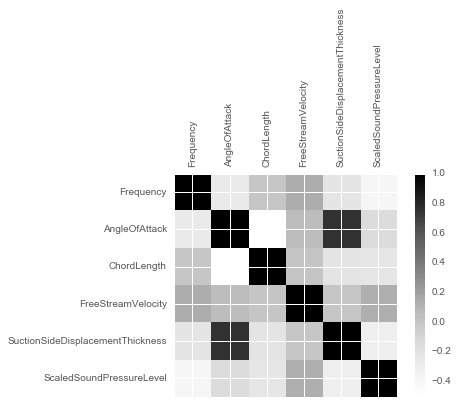

In [134]:

corr = df.corr()
figure = plt.figure()
subplot = figure.add_subplot(1, 1, 1)
figure.colorbar(subplot.matshow(corr))
subplot.set_xticklabels([None] + list(corr.columns), rotation = 90)
subplot.set_yticklabels([None] + list(corr.columns))

In [135]:
df.corr()

,Frequency,AngleOfAttack,ChordLength,FreeStreamVelocity,SuctionSideDisplacementThickness,ScaledSoundPressureLevel
Frequency,1.000000,-0.272765,-0.003661,0.133664,-0.230107,-0.390711
AngleOfAttack,-0.272765,1.000000,-0.504868,0.058760,0.753394,-0.156108
ChordLength,-0.003661,-0.504868,1.000000,0.003787,-0.220842,-0.236162
FreeStreamVelocity,0.133664,0.058760,0.003787,1.000000,-0.003974,0.125103
SuctionSideDisplacementThickness,-0.230107,0.753394,-0.220842,-0.003974,1.000000,-0.312670
ScaledSoundPressureLevel,-0.390711,-0.156108,-0.236162,0.125103,-0.312670,1.000000


In [136]:
df.describe()

,Frequency,AngleOfAttack,ChordLength,FreeStreamVelocity,SuctionSideDisplacementThickness,ScaledSoundPressureLevel
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [137]:
df_norm = (df - df.mean()) / (df.max() - df.min())

In [138]:
df_norm

,Frequency,AngleOfAttack,ChordLength,FreeStreamVelocity,SuctionSideDisplacementThickness,ScaledSoundPressureLevel
0,-0.105373,-0.305509,0.602190,0.516143,-0.146120,0.036298
1,-0.095272,-0.305509,0.602190,0.516143,-0.146120,0.009707
2,-0.082645,-0.305509,0.602190,0.516143,-0.146120,0.029650
3,-0.064969,-0.305509,0.602190,0.516143,-0.146120,0.073259
4,-0.044767,-0.305509,0.602190,0.516143,-0.146120,0.069802
...,...,...,...,...,...,...
1498,-0.019514,0.397194,-0.125083,-0.284362,0.718986,-0.387480
1499,0.013314,0.397194,-0.125083,-0.284362,0.718986,-0.414336
1500,0.056243,0.397194,-0.125083,-0.284362,0.718986,-0.484802
1501,0.106748,0.397194,-0.125083,-0.284362,0.718986,-0.494906


In [139]:
df_norm.mean()

Frequency                          -2.954685e-19
AngleOfAttack                       2.826969e-15
ChordLength                         7.050507e-15
FreeStreamVelocity                 -3.452033e-15
SuctionSideDisplacementThickness    1.564506e-16
ScaledSoundPressureLevel            3.230505e-15
dtype: float64

In [140]:
train_df = df.sample(frac = .6, random_state = 0).sort_index()

In [141]:
train_df

,Frequency,AngleOfAttack,ChordLength,FreeStreamVelocity,SuctionSideDisplacementThickness,ScaledSoundPressureLevel
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
4,2000,0.0,0.3048,71.3,0.002663,127.461
5,2500,0.0,0.3048,71.3,0.002663,125.571
6,3150,0.0,0.3048,71.3,0.002663,125.201
...,...,...,...,...,...,...
1493,800,15.6,0.1016,39.6,0.052849,118.964
1495,1250,15.6,0.1016,39.6,0.052849,118.214
1496,1600,15.6,0.1016,39.6,0.052849,114.554
1499,3150,15.6,0.1016,39.6,0.052849,109.254


In [142]:
test_df = df.drop(train_df.index)

In [143]:
test_df

,Frequency,AngleOfAttack,ChordLength,FreeStreamVelocity,SuctionSideDisplacementThickness,ScaledSoundPressureLevel
0,800,0.0,0.3048,71.3,0.002663,126.201
3,1600,0.0,0.3048,71.3,0.002663,127.591
7,4000,0.0,0.3048,71.3,0.002663,123.061
11,10000,0.0,0.3048,71.3,0.002663,115.391
17,1000,0.0,0.3048,55.5,0.002831,126.966
...,...,...,...,...,...,...
1494,1000,15.6,0.1016,39.6,0.052849,119.224
1497,2000,15.6,0.1016,39.6,0.052849,110.894
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1500,4000,15.6,0.1016,39.6,0.052849,106.604


In [144]:
train_df.describe()

,Frequency,AngleOfAttack,ChordLength,FreeStreamVelocity,SuctionSideDisplacementThickness,ScaledSoundPressureLevel
count,902.000000,902.000000,902.000000,902.000000,902.000000,902.000000
mean,2861.258315,6.571619,0.138039,50.649224,0.010907,124.964155
std,3186.162323,5.912589,0.092733,15.394745,0.013023,6.953162
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,630.000000,1.500000,0.050800,39.600000,0.002514,120.228250
50%,1600.000000,5.300000,0.101600,39.600000,0.004738,125.869500
75%,4000.000000,9.900000,0.228600,71.300000,0.015048,130.107000
max,20000.000000,22.200000,0.304800,71.300000,0.058411,139.918000


In [145]:
train_df.corr()

,Frequency,AngleOfAttack,ChordLength,FreeStreamVelocity,SuctionSideDisplacementThickness,ScaledSoundPressureLevel
Frequency,1.000000,-0.271156,-0.012935,0.146855,-0.218239,-0.381408
AngleOfAttack,-0.271156,1.000000,-0.502879,0.042965,0.758484,-0.180314
ChordLength,-0.012935,-0.502879,1.000000,0.015847,-0.229189,-0.221540
FreeStreamVelocity,0.146855,0.042965,0.015847,1.000000,-0.034552,0.103346
SuctionSideDisplacementThickness,-0.218239,0.758484,-0.229189,-0.034552,1.000000,-0.325001
ScaledSoundPressureLevel,-0.381408,-0.180314,-0.221540,0.103346,-0.325001,1.000000


In [146]:
train_model = smf.ols(formula = 'ScaledSoundPressureLevel ~ ChordLength + FreeStreamVelocity + SuctionSideDisplacementThickness + Frequency', data = train_df).fit().summary()

In [147]:
train_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     ScaledSoundPressureLevel   R-squared:                       0.461
Model:                                  OLS   Adj. R-squared:                  0.458
Method:                       Least Squares   F-statistic:                     191.5
Date:                      Tue, 11 Oct 2016   Prob (F-statistic):          1.16e-118
Time:                              21:05:44   Log-Likelihood:                -2750.1
No. Observations:                       902   AIC:                             5510.
Df Residuals:                           897   BIC:                             5534.
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------------
Intercept                          130.9823      0.686    190.924      0.000       129.636   132.329
ChordLength                        -26.1353      1.893    -13.804      0.000       -29.851   -22.419
FreeStreamVelocity                   0.0758      0.011      6.771      0.000         0.054     0.098
SuctionSideDisplacementThickness  -273.9574     13.811    -19.836      0.000      -301.063  -246.851
Frequency                           -0.0011   5.55e-05    -20.536      0.000        -0.001    -0.001
==============================================================================
Omnibus:                       19.752   Durbin-Watson:                   0.710
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.679
Skew:                          -0.172   Prob(JB):                     1.32e-07
Kurtosis:                       3.851   Cond. No.                     3.47e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [148]:
train_model = smf.ols(formula = 'ScaledSoundPressureLevel ~ ChordLength + FreeStreamVelocity + SuctionSideDisplacementThickness + Frequency', data = train_df ).fit()

In [149]:
pre = train_model.predict(test_df)

In [150]:
metrics.r2_score(test_df.ScaledSoundPressureLevel, pre)

0.50077982697077383